<b>Author:</b> ...

<b>Contributors:</b> ...


<div class="alert alert-block alert-info">
Before you start running this notebook, make sure you are using the Hail Genomics Analysis Environment. To do so,
<br/>
    
<ul>
    <li>Click on the <b>cloud analysis environment</b> icon on the righthand side of the screen.</li>
    <li>Inside <b>Recommended environments</b>, select <b>Hail Genomics Analysis</b> which creates a cloud environment for your analyses.</li>
    <li>This analysis can be run with <b>low compute</b> (e.g. 2 workers with 4 CPUs, 15 GB of RAM).</li>
    <li>Click on <b>Next</b>.</li>
</ul>
    
</div>

<h1>Notebook Objectives</h1>

This notebook shows where the BAM files and manifest are, how to localize the manifest or a known BAM to your workspace bucket and active environment, and how to use the manifest to localize BAMs by the included paths.

<b>How to Use this Notebook...</b>

<b>As a tutorial:</b>

...

<b>As a resource:</b>

...

<h2>Relevant Information:</h2>

...

In [3]:
!gsutil -u $GOOGLE_PROJECT ls gs://fc-aou-datasets-controlled/v7/wgs

gs://fc-aou-datasets-controlled/v7/wgs/cram/
gs://fc-aou-datasets-controlled/v7/wgs/long_read/
gs://fc-aou-datasets-controlled/v7/wgs/short_read/


In [5]:
!gsutil -u $GOOGLE_PROJECT ls $WORKSPACE_BUCKET/

gs://fc-secure-dd46533c-db9d-4aa1-91ab-1bd479e3da50/cromwell_input/
gs://fc-secure-dd46533c-db9d-4aa1-91ab-1bd479e3da50/datatables/
gs://fc-secure-dd46533c-db9d-4aa1-91ab-1bd479e3da50/notebooks/
gs://fc-secure-dd46533c-db9d-4aa1-91ab-1bd479e3da50/scratch/


In [6]:
import pandas as pd
import numpy as np
import pysam
import os

In [7]:
import pysam
from pysam import VariantFile

from collections import defaultdict
from collections import Counter

from tqdm.notebook import tqdm

In [8]:
import hail as hl
from hail.plot import show
from pprint import pprint

Loading BokehJS ...

In [9]:
bucket = os.environ['WORKSPACE_BUCKET']
workspace = os.environ['WORKSPACE_NAME']
namespace = os.environ['WORKSPACE_NAMESPACE']

In [10]:
if not os.path.exists("AoU_srWGS_SV.vcf.gz"):
    !gsutil -u $GOOGLE_PROJECT cp gs://fc-aou-datasets-controlled/v7/wgs/short_read/structural_variants/vcf/AoU_srWGS_SV.vcf.gz .
    !gsutil -u $GOOGLE_PROJECT cp gs://fc-aou-datasets-controlled/v7/wgs/short_read/structural_variants/vcf/AoU_srWGS_SV.vcf.gz.tbi .

In [11]:
sr_sv_samples = !zgrep -m1 '^#CHROM' AoU_srWGS_SV.vcf.gz | cut -f10- | sed 's/\t/\n/g'

In [12]:
len(sr_sv_samples)

11390

In [13]:
lr_sv_samples = !gsutil -u $GOOGLE_PROJECT cat gs://fc-aou-datasets-controlled/v7/wgs/long_read/joint_vcf/GRCh38/cohort_for_GLNexus_2023Q1_1027.g.vcf.bgz | zgrep -m1 '^#CHROM' | cut -f10- | sed 's/\t/\n/g'
len(lr_sv_samples)

1027

In [14]:
common_samples_1027 = lr_sv_samples
len(common_samples_1027)

1027

In [15]:
common_samples_989 = list(set(sr_sv_samples) & set(lr_sv_samples))
len(common_samples_989)

989

In [75]:
spark_conf_more_ram = dict()
spark_conf_more_ram["spark.executor.memory"] = "8g"
spark_conf_more_ram["spark.driver.memory"] = "196g"

# hl.init(default_reference='GRCh38', idempotent=True, spark_conf=spark_conf_more_ram)

hl.init(idempotent=True, spark_conf=spark_conf_more_ram)

In [48]:
hl.default_reference('GRCh38')

In [ ]:
vds = hl.vds.read_vds('gs://fc-aou-datasets-controlled/v7/wgs/short_read/snpindel/vds/hail.vds')

In [ ]:
callset_sample_filtered_1027 = hl.vds.filter_samples(vds, common_samples_1027, keep=True, remove_dead_alleles=True)

In [ ]:
callset_sample_filtered_1027.write(f'{bucket}/scratch/kvg/srs-subset.1027.vds', overwrite=True)

In [ ]:
callset_sample_filtered_1027 = hl.vds.read_vds(f'{bucket}/scratch/kvg/srs-subset.1027.vds')

In [78]:
common_samples_1027

['1000151',
 '1000513',
 '1000920',
 '1001399',
 '1001980',
 '1002322',
 '1002826',
 '1004266',
 '1005038',
 '1005444',
 '1005938',
 '1007198',
 '1008775',
 '1010384',
 '1012440',
 '1012736',
 '1013536',
 '1014457',
 '1014625',
 '1014694',
 '1014764',
 '1014823',
 '1015059',
 '1015507',
 '1016971',
 '1016985',
 '1019345',
 '1024761',
 '1025136',
 '1025342',
 '1025566',
 '1025694',
 '1026351',
 '1026529',
 '1026622',
 '1027488',
 '1027673',
 '1029520',
 '1029873',
 '1032052',
 '1032684',
 '1036042',
 '1037292',
 '1037774',
 '1037790',
 '1037792',
 '1037950',
 '1041753',
 '1042609',
 '1044452',
 '1044533',
 '1045706',
 '1046956',
 '1048940',
 '1049766',
 '1049962',
 '1051888',
 '1051902',
 '1053040',
 '1053045',
 '1054738',
 '1055639',
 '1056523',
 '1062769',
 '1063143',
 '1063400',
 '1066415',
 '1069468',
 '1069495',
 '1069561',
 '1070345',
 '1071747',
 '1072003',
 '1072047',
 '1072232',
 '1072458',
 '1072993',
 '1073932',
 '1075053',
 '1075712',
 '1076307',
 '1076901',
 '1077805',
 '10

In [83]:
!gsutil -u $GOOGLE_PROJECT ls gs://fc-aou-datasets-controlled/v7/wgs/short_read/snpindel/vds/

gs://fc-aou-datasets-controlled/v7/wgs/short_read/snpindel/vds/hail.vds/


In [57]:
mt = hl.read_matrix_table('gs://fc-aou-datasets-controlled/v6/wgs/hail.mt')

In [79]:
len(mt.s.collect())

98590

In [58]:
mt_subset = mt.filter_cols(hl.set(common_samples_1027).contains(mt.s))

In [59]:
mt_subset.write(f'{bucket}/scratch/kvg/srs-subset.1027.mt', overwrite=True)

2024-09-06 13:23:44.141 Hail: INFO: wrote matrix table with 702574937 rows and 1 column in 140126 partitions to gs://fc-secure-dd46533c-db9d-4aa1-91ab-1bd479e3da50/scratch/kvg/srs-subset.1027.mt


In [60]:
mt_subset = hl.read_matrix_table(f'{bucket}/scratch/kvg/srs-subset.1027.mt')

In [63]:
sample_names = mt_subset.s.collect()

In [64]:
sample_names

['1682874']

In [45]:
!gsutil -u $GOOGLE_PROJECT ls gs://fc-aou-datasets-controlled/v5/wgs/hail.mt/

gs://fc-aou-datasets-controlled/v5/wgs/hail.mt/README.txt
gs://fc-aou-datasets-controlled/v5/wgs/hail.mt/_SUCCESS
gs://fc-aou-datasets-controlled/v5/wgs/hail.mt/metadata.json.gz
gs://fc-aou-datasets-controlled/v5/wgs/hail.mt/cols/
gs://fc-aou-datasets-controlled/v5/wgs/hail.mt/entries/
gs://fc-aou-datasets-controlled/v5/wgs/hail.mt/globals/
gs://fc-aou-datasets-controlled/v5/wgs/hail.mt/index/
gs://fc-aou-datasets-controlled/v5/wgs/hail.mt/rows/


In [8]:
!set

ANACONDA_PYTHON_VERSION=3.10
ARTIFACT_REGISTRY_DOCKER_REPO=us-central1-docker.pkg.dev/all-of-us-rw-prod/aou-rw-gar-remote-repo-docker-prod
BASH=/bin/bash
BASHOPTS=checkwinsize:cmdhist:complete_fullquote:extquote:force_fignore:globasciiranges:hostcomplete:interactive_comments:progcomp:promptvars:sourcepath
BASH_ALIASES=()
BASH_ARGC=()
BASH_ARGV=()
BASH_CMDS=()
BASH_EXECUTION_STRING=set
BASH_LINENO=()
BASH_SOURCE=()
BASH_VERSINFO=([0]="5" [1]="0" [2]="17" [3]="1" [4]="release" [5]="x86_64-pc-linux-gnu")
BASH_VERSION='5.0.17(1)-release'
BIGQUERY_STORAGE_API_ENABLED=true
BOLT_LMM_VERSION=v2.4.1
CDR_STORAGE_PATH=gs://fc-aou-datasets-controlled/v7
CLICOLOR=1
CLICOLOR_FORCE=1
CLUSTER_NAME=all-of-us-4275
CONTAINER_NAME=tf2-gpu/2-11+cu113
CUDA_VERSION=11.3.1
DEBIAN_FRONTEND=noninteractive
DIRSTACK=()
DL_ANACONDA_HOME=/opt/conda
DOTNET_VERSION=2.1.26
ENABLE_MULTI_ENV=false
EUID=1000
FORCE_COLOR=1
GATK_VERSION=4.3.0.0
GATK_ZIP_PATH=/tmp/gatk-4.3.0.0.zip
GCSFUSE_METADATA_IMAGE_TYPE=DLC
GCTA_VERSIO

In [ ]:
!gsutil -u $GOOGLE_PROJECT ls $WDS_VDS_PATH

In [20]:
!gsutil -u $GOOGLE_PROJECT cat gs://fc-aou-datasets-controlled/v7/wgs/short_read/snpindel/exome_v7.1/vcf/exome.chr22.vcf.bgz | zgrep -m1 '^#CHROM' | cut -f10- | sed 's/\t/\n/g'
    

1000004	1000033	1000039	1000042	1000045	1000059	1000061	1000070	1000091	1000093	1000095	1000104	1000109	1000112	1000117	1000131	1000151	1000158	1000168	1000184	1000185	1000186	1000192	1000195	1000196	1000202	1000204	1000206	1000207	1000216	1000222	1000234	1000253	1000260	1000262	1000265	1000275	1000278	1000291	1000292	1000301	1000307	1000314	1000320	1000322	1000327	1000357	1000367	1000370	1000373	1000379	1000384	1000387	1000396	1000402	1000413	1000417	1000425	1000434	1000439	1000450	1000452	1000464	1000471	1000477	1000479	1000484	1000487	1000492	1000497	1000502	1000509	1000513	1000530	1000531	1000534	1000536	1000569	1000570	1000571	1000574	1000585	1000586	1000594	1000598	1000599	1000610	1000612	1000618	1000625	1000640	1000645	1000659	1000661	1000671	1000672	1000678	1000683	1000688	1000689	1000691	1000696	1000700	1000706	1000709	1000717	1000731	1000753	1000761	1000774	1000783	1000785	1000801	1000803	1000843	1000865	1000878	1000896	1000913	1000914	1000916	1000920	1000921	1000922	1000923	

1100545	1100577	1100580	1100582	1100586	1100595	1100604	1100621	1100631	1100639	1100646	1100649	1100667	1100679	1100694	1100709	1100712	1100719	1100731	1100733	1100743	1100747	1100749	1100759	1100794	1100801	1100818	1100825	1100829	1100845	1100864	1100899	1100917	1100928	1100929	1100932	1100934	1100968	1100976	1100980	1100985	1101019	1101034	1101048	1101053	1101054	1101059	1101069	1101072	1101080	1101082	1101083	1101084	1101087	1101088	1101100	1101102	1101109	1101114	1101122	1101136	1101155	1101159	1101196	1101198	1101219	1101234	1101241	1101245	1101252	1101273	1101283	1101286	1101288	1101296	1101297	1101313	1101330	1101336	1101337	1101350	1101351	1101355	1101358	1101360	1101383	1101392	1101394	1101399	1101410	1101422	1101430	1101431	1101454	1101477	1101485	1101486	1101493	1101498	1101503	1101508	1101524	1101526	1101532	1101537	1101546	1101557	1101558	1101563	1101566	1101576	1101578	1101585	1101592	1101596	1101598	1101611	1101627	1101632	1101641	1101647	1101648	1101660	1101662	1101676	

1374856	1374859	1374861	1374881	1374883	1374889	1374890	1374893	1374896	1374897	1374900	1374910	1374918	1374926	1374928	1374932	1374935	1374950	1374958	1374965	1374968	1374983	1374987	1374988	1375001	1375011	1375051	1375053	1375071	1375074	1375087	1375091	1375095	1375096	1375102	1375105	1375116	1375118	1375131	1375137	1375162	1375169	1375191	1375220	1375225	1375227	1375234	1375243	1375259	1375266	1375294	1375303	1375304	1375313	1375321	1375333	1375340	1375344	1375346	1375348	1375354	1375360	1375363	1375371	1375382	1375385	1375389	1375394	1375396	1375400	1375404	1375407	1375408	1375431	1375433	1375434	1375443	1375446	1375450	1375453	1375458	1375459	1375485	1375491	1375497	1375499	1375514	1375518	1375519	1375533	1375534	1375555	1375564	1375590	1375593	1375606	1375608	1375614	1375619	1375631	1375642	1375647	1375649	1375653	1375654	1375656	1375657	1375672	1375680	1375685	1375687	1375722	1375741	1375757	1375759	1375776	1375777	1375782	1375784	1375807	1375808	1375814	1375820	1375823	1375842	

1651902	1651910	1651933	1651939	1651949	1651955	1651958	1651961	1651966	1651975	1651976	1652003	1652004	1652009	1652016	1652022	1652027	1652038	1652044	1652048	1652056	1652062	1652075	1652076	1652081	1652086	1652091	1652097	1652107	1652138	1652142	1652166	1652180	1652185	1652192	1652196	1652215	1652237	1652239	1652244	1652253	1652254	1652285	1652291	1652294	1652304	1652313	1652318	1652320	1652327	1652347	1652351	1652377	1652380	1652396	1652404	1652409	1652418	1652421	1652425	1652431	1652449	1652463	1652493	1652505	1652506	1652526	1652535	1652543	1652552	1652557	1652571	1652579	1652594	1652596	1652608	1652620	1652626	1652648	1652655	1652666	1652686	1652703	1652716	1652720	1652722	1652734	1652744	1652755	1652766	1652780	1652784	1652787	1652790	1652793	1652794	1652797	1652801	1652807	1652808	1652823	1652829	1652840	1652847	1652857	1652861	1652862	1652871	1652886	1652894	1652899	1652931	1652943	1652952	1652969	1652981	1652985	1652993	1652995	1653002	1653007	1653017	1653029	1653035	1653041	

1935889	1935891	1935894	1935900	1935910	1935914	1935926	1935935	1935937	1935946	1935947	1935953	1935964	1935967	1935969	1935971	1935977	1935981	1935991	1935994	1935996	1936009	1936015	1936018	1936032	1936034	1936038	1936048	1936062	1936065	1936068	1936072	1936073	1936077	1936086	1936090	1936103	1936109	1936116	1936119	1936125	1936136	1936139	1936150	1936151	1936184	1936190	1936193	1936195	1936199	1936200	1936204	1936210	1936233	1936239	1936253	1936254	1936276	1936286	1936288	1936297	1936301	1936312	1936313	1936316	1936333	1936334	1936341	1936351	1936361	1936396	1936406	1936409	1936410	1936443	1936444	1936451	1936452	1936456	1936472	1936486	1936499	1936504	1936507	1936513	1936517	1936536	1936541	1936542	1936543	1936545	1936548	1936571	1936585	1936594	1936605	1936611	1936628	1936629	1936632	1936633	1936634	1936638	1936643	1936651	1936657	1936662	1936670	1936676	1936691	1936697	1936708	1936714	1936724	1936731	1936737	1936746	1936754	1936776	1936797	1936801	1936803	1936807	1936811	1936849	

2373415	2373439	2373444	2373476	2373549	2373574	2373655	2373659	2373665	2373687	2373706	2373746	2373747	2373750	2373759	2373760	2373799	2373801	2373857	2373862	2373878	2373884	2373890	2373891	2373908	2373917	2373920	2373936	2373960	2373963	2373972	2373973	2373975	2373992	2373998	2374001	2374012	2374035	2374087	2374095	2374110	2374154	2374158	2374173	2374210	2374212	2374218	2374244	2374251	2374282	2374294	2374296	2374303	2374307	2374354	2374358	2374425	2374430	2374436	2374453	2374463	2374490	2374541	2374548	2374569	2374581	2374590	2374602	2374603	2374620	2374647	2374708	2374730	2374753	2374772	2374826	2374888	2374940	2375000	2375009	2375022	2375030	2375072	2375075	2375103	2375128	2375132	2375150	2375151	2375166	2375168	2375171	2375178	2375185	2375192	2375211	2375236	2375252	2375262	2375291	2375300	2375304	2375310	2375313	2375336	2375383	2375388	2375389	2375391	2375393	2375411	2375418	2375433	2375446	2375451	2375467	2375474	2375493	2375504	2375505	2375511	2375516	2375589	2375595	2375596	

2940715	2940718	2940726	2940727	2940731	2940785	2940794	2940798	2940802	2940814	2940879	2940907	2940908	2940978	2941017	2941037	2941082	2941137	2941140	2941148	2941159	2941173	2941215	2941276	2941280	2941298	2941306	2941331	2941350	2941354	2941359	2941362	2941364	2941378	2941386	2941389	2941405	2941415	2941457	2941468	2941489	2941508	2941514	2941567	2941602	2941604	2941613	2941627	2941632	2941634	2941638	2941644	2941666	2941671	2941704	2941709	2941746	2941774	2941788	2941798	2941811	2941813	2941823	2941831	2941846	2941864	2941866	2941871	2941876	2941937	2941941	2941943	2941962	2942013	2942022	2942026	2942031	2942061	2942108	2942128	2942158	2942162	2942163	2942178	2942179	2942183	2942195	2942249	2942263	2942277	2942285	2942292	2942304	2942322	2942326	2942327	2942338	2942345	2942369	2942401	2942409	2942413	2942414	2942425	2942488	2942503	2942527	2942557	2942573	2942584	2942612	2942617	2942649	2942652	2942679	2942709	2942715	2942718	2942719	2942723	2942741	2942743	2942751	2942756	2942853	

3501537	3501568	3501573	3501582	3501630	3501656	3501701	3501704	3501729	3501732	3501745	3501746	3501748	3501767	3501769	3501773	3501778	3501796	3501827	3501839	3501840	3501860	3501865	3501884	3501895	3501902	3501916	3501945	3501960	3501961	3501963	3501978	3501987	3501989	3501992	3502018	3502061	3502068	3502069	3502075	3502109	3502127	3502136	3502166	3502192	3502197	3502205	3502207	3502231	3502247	3502299	3502302	3502309	3502311	3502318	3502337	3502340	3502358	3502392	3502427	3502471	3502490	3502510	3502542	3502543	3502555	3502562	3502611	3502644	3502654	3502700	3502705	3502716	3502751	3502755	3502759	3502792	3502816	3502817	3502820	3502858	3502878	3502897	3502909	3502938	3502941	3503010	3503039	3503048	3503063	3503081	3503083	3503099	3503100	3503134	3503136	3503142	3503156	3503167	3503206	3503218	3503230	3503253	3503265	3503274	3503289	3503292	3503315	3503323	3503341	3503356	3503358	3503391	3503432	3503445	3503475	3503494	3503506	3503522	3503533	3503552	3503567	3503572	3503588	3503606	

8379687	8379718	8380162	8380188	8380633	8380645	8380706	8380713	8380842	8381310	8381335	8381877	8382132	8382330	8383020	8383081	8383238	8383248	8383372	8383653	8383781	8383974	8384121	8384143	8384508	8385181	8385190	8385629	8385651	8386074	8386312	8386395	8386549	8386578	8386672	8386778	8386872	8386882	8387055	8387184	8387200	8387232	8387286	8387296	8387314	8388016	8388125	8388144	8388601	8388631	8389223	8389299	8389534	8389819	8389887	8389888	8390459	8390485	8390962	8391614	8391630	8392656	8392685	8392752	8393355	8393414	8394456	8394617	8394751	8394942	8395293	8395512	8395613	8395637	8395945	8396432	8396493	8396654	8396743	8396750	8397049	8397740	8398336	8398405	8398478	8398507	8398528	8398727	8398730	8398880	8398971	8399084	8399287	8399436	8399819	8400296	8400656	8400717	8401173	8401383	8401466	8401477	8401489	8401826	8402383	8402511	8402616	8402682	8402687	8402806	8403029	8403156	8403389	8403417	8403516	8404034	8404044	8404081	8404534	8404610	8405368	8405639	8405868	8405936	8406205	

In [14]:
!gsutil -u $GOOGLE_PROJECT ls gs://fc-aou-datasets-controlled/v7/wgs/short_read/structural_variants/vcf/
        

gs://fc-aou-datasets-controlled/v7/wgs/short_read/structural_variants/vcf/AoU_srWGS_SV.vcf.gz
gs://fc-aou-datasets-controlled/v7/wgs/short_read/structural_variants/vcf/AoU_srWGS_SV.vcf.gz.tbi


In [19]:
with open('sample_list.txt', 'w') as sample_list:
    for sample_name in common_samples_989:
        sample_list.write(f'{sample_name}\n')

In [20]:
!cat sample_list.txt

1597494
1604558
1767168
1608659
1920682
2055591
1580771
3059091
2074409
1803959
2873829
1409815
1398281
1242468
1287435
1305517
1813491
1577460
1100422
1304933
3055180
1354463
1799468
1908993
1317367
1897731
1951805
2256312
1755091
2015877
1138352
1797863
1223099
1007198
1544820
1444951
1049962
1841064
1688365
3422452
1919216
1515663
1002322
2537487
3438535
1173769
1250230
1266895
3392491
2011071
1804979
1754781
1529969
1815792
1245351
1076901
1804712
1535702
2968413
1244833
1118944
1937528
1347150
1480116
1600466
7814517
1483110
1846359
1502927
1715617
1827456
2064977
1075712
1978695
3307309
1157650
1292965
1013536
1850949
1088070
1652801
1001980
1066415
1198053
1815174
1073932
1196825
1401603
1747469
1728436
1082778
1437510
1693141
1768104
1199035
1153242
1301927
1996705
2799599
1396736
1955715
1170041
1438504
1979844
1451088
1300613
1718550
2003411
3028984
1637473
1968324
1911405
1936708
1111651
1209758
1379991
1240282
1184349
2023852
1160394
1947744
1887928
1077805
1644835
1718573


In [17]:
!bcftools


Program: bcftools (Tools for variant calling and manipulating VCFs and BCFs)
Version: 1.12 (using htslib 1.12)

Usage:   bcftools [--version|--version-only] [--help] <command> <argument>

Commands:

 -- Indexing
    index        index VCF/BCF files

 -- VCF/BCF manipulation
    annotate     annotate and edit VCF/BCF files
    concat       concatenate VCF/BCF files from the same set of samples
    convert      convert VCF/BCF files to different formats and back
    isec         intersections of VCF/BCF files
    merge        merge VCF/BCF files files from non-overlapping sample sets
    norm         left-align and normalize indels
    plugin       user-defined plugins
    query        transform VCF/BCF into user-defined formats
    reheader     modify VCF/BCF header, change sample names
    sort         sort VCF/BCF file
    view         VCF/BCF conversion, view, subset and filter VCF/BCF files

 -- VCF/BCF analysis
    call         SNP/indel calling
    consensus    create consensus s

In [21]:
!bcftools view -S sample_list.txt --force-samples -o AoU_srWGS_SV.subset.vcf.gz -O z AoU_srWGS_SV.vcf.gz

In [25]:
!ls -lh

total 4.0G
-rw-rw-r-- 1 jupyter     users 821M Jan 15 22:53 AoU_srWGS_SV.subset.vcf.gz
-rw-rw-r-- 1 jupyter     users 3.1G Jan 15 21:01 AoU_srWGS_SV.vcf.gz
-rw-rw-r-- 1 jupyter     users 913K Jan 15 21:01 AoU_srWGS_SV.vcf.gz.tbi
-rw-rw-r-- 1 jupyter     users 886K Jan 13 03:15 highlighted_zip_codes_map.pdf
-rw-rw-r-- 1 welder-user users  19M Jan 13 02:43 init_subset_vds.ipynb
-rw-rw-r-- 1 welder-user users  26K Jan 13 02:43 JW_CYP2D6.ipynb
-rw-rw-r-- 1 welder-user users  14K Jan 13 02:43 JW_repeat_expansion_figures.ipynb
-rw-rw-r-- 1 welder-user users 442K Jan 13 02:43 kvg_pmi_skip_participants.ipynb
-rw-rw-r-- 1 welder-user users  29K Jan 13 02:43 main_figure_01_length_distributions.ipynb
-rw-rw-r-- 1 welder-user users 145K Jan 13 17:46 main_figure_01_map.ipynb
-rw-rw-r-- 1 welder-user users 224K Jan 13 02:43 main_figure_01_pca.ipynb
-rw-rw-r-- 1 welder-user users 471K Jan 13 02:43 main_table_01_dataset_summary.ipynb
-rw-rw-r-- 1 welder-user users  15K Jan 13 11:01 main_table_02_short

In [17]:
def count_svtype_per_sample(vcf_file_path):
    """
    Iterates over each line in a VCF file and counts the number of variants
    of each SVTYPE for each sample.

    Parameters:
        vcf_file_path (str): Path to the VCF file.

    Returns:
        dict: A nested dictionary where the outer keys are sample names,
              inner keys are SVTYPEs, and values are counts.
    """
    # Open the VCF file
    try:
        vcf = pysam.VariantFile(vcf_file_path)
    except FileNotFoundError:
        raise FileNotFoundError(f"VCF file not found at: {vcf_file_path}")
        
    num_records_line = !zgrep -vc ^'#' {vcf_file_path}
    num_records = int(num_records_line[0])
    
    # Initialize the dictionary for counts
    svtype_counts = defaultdict(lambda: defaultdict(int))
    
    # Iterate through each record in the VCF
    for record in tqdm(vcf.fetch(), total=num_records, desc="Processing VCF records"):
        # Get the SVTYPE from the INFO field
        svtype = record.info.get('SVTYPE', None)
        if not svtype:
            continue  # Skip if SVTYPE is not present
        
        # Update counts for each sample
        for sample in record.samples:
            genotype = record.samples[sample].get('GT')
            if genotype is None or any(gt is None for gt in genotype):
                continue  # Skip no-calls (./.)
            
            if any(gt != 0 for gt in genotype):  # Check for non-reference alleles
                svtype_counts[sample][svtype] += 1
                
    return svtype_counts

In [18]:
sv_short_reads_counts = count_svtype_per_sample('AoU_srWGS_SV.subset.vcf.gz')

[E::idx_find_and_load] Could not retrieve index file for 'AoU_srWGS_SV.subset.vcf.gz'


Processing VCF records:   0%|          | 0/516601 [00:00<?, ?it/s]

In [19]:
sv_short_reads_counts

defaultdict(<function __main__.count_svtype_per_sample.<locals>.<lambda>()>,
            {'1287435': defaultdict(int,
                         {'BND': 2454,
                          'DEL': 5395,
                          'DUP': 3226,
                          'INS': 4393,
                          'CPX': 232,
                          'INV': 8}),
             '1908993': defaultdict(int,
                         {'BND': 1692,
                          'DUP': 3193,
                          'INS': 3919,
                          'DEL': 4767,
                          'CPX': 231,
                          'INV': 9,
                          'CTX': 1}),
             '1444951': defaultdict(int,
                         {'BND': 1784,
                          'DUP': 3348,
                          'DEL': 4986,
                          'INS': 4191,
                          'CPX': 222,
                          'CTX': 1,
                          'INV': 11}),
             '2064977': default

In [20]:
import json

with open('sv_sens_sr_counts.json', 'w') as json_file:
    json.dump(sv_short_reads_counts, json_file, indent=4)

In [31]:
import matplotlib.pyplot as plt
import numpy as np

def plot_sv_counts(svtype_counts):
    """
    Creates a stacked bar plot of SV counts for each sample.

    Parameters:
        svtype_counts (dict): Nested dictionary with sample names as keys, 
                              SVTYPEs as subkeys, and counts as values.
    """
    # Extract sample names and SVTYPEs
    samples = list(svtype_counts.keys())
    svtypes = ['INS', 'DEL', 'UNK']  # Define SV types to include in the plot

    # Prepare data for insertions and deletions
    insertion_counts = [svtype_counts[sample].get('INS', 0) for sample in samples]
    deletion_counts = [svtype_counts[sample].get('DEL', 0) for sample in samples]
    unknown_counts = [svtype_counts[sample].get('UNK', 0) for sample in samples]

    # Define x-axis positions for samples
    x = np.arange(len(samples))

    # Set up the figure
    fig, ax = plt.subplots(figsize=(12, 8))

    # Stack insertions and unknowns for positive y-axis
    ax.bar(x, insertion_counts, label='Insertions', color='skyblue')
    ax.bar(x, unknown_counts, bottom=insertion_counts, label='Unknowns', color='lightgreen')

    # Stack deletions for negative y-axis
    ax.bar(x, [-count for count in deletion_counts], label='Deletions', color='salmon')

    # Customize the plot
    ax.axhline(0, color='black', linewidth=0.8)  # Add a horizontal line at y=0
    ax.set_xticks(x)
    ax.set_xticklabels(samples, rotation=45, ha='right')  # Rotate x-axis labels for better visibility
    ax.set_ylabel('SV Counts')
    ax.set_title('Stacked Bar Plot of SV Counts')
    ax.legend(loc='upper left', bbox_to_anchor=(1, 1))  # Place legend outside the plot

    # Adjust layout
    plt.tight_layout()
    plt.show()

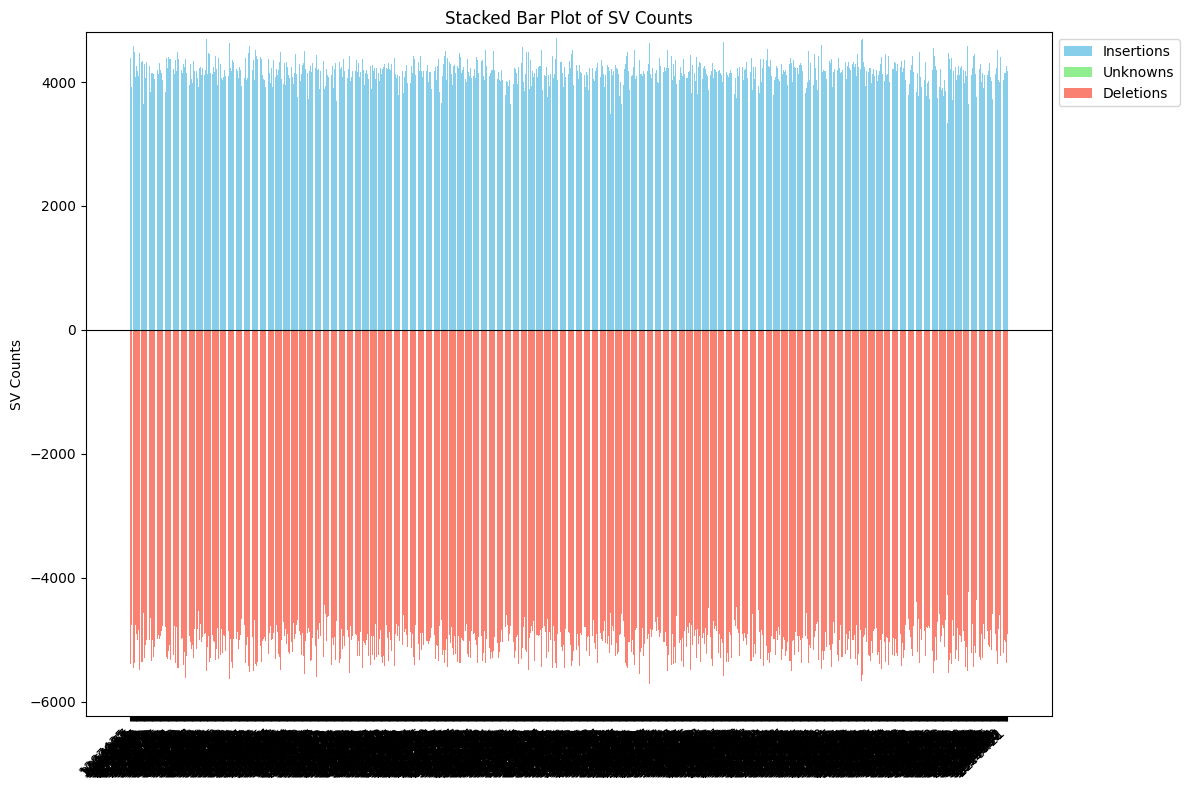

In [32]:
plot_sv_counts(sv_short_reads_counts)

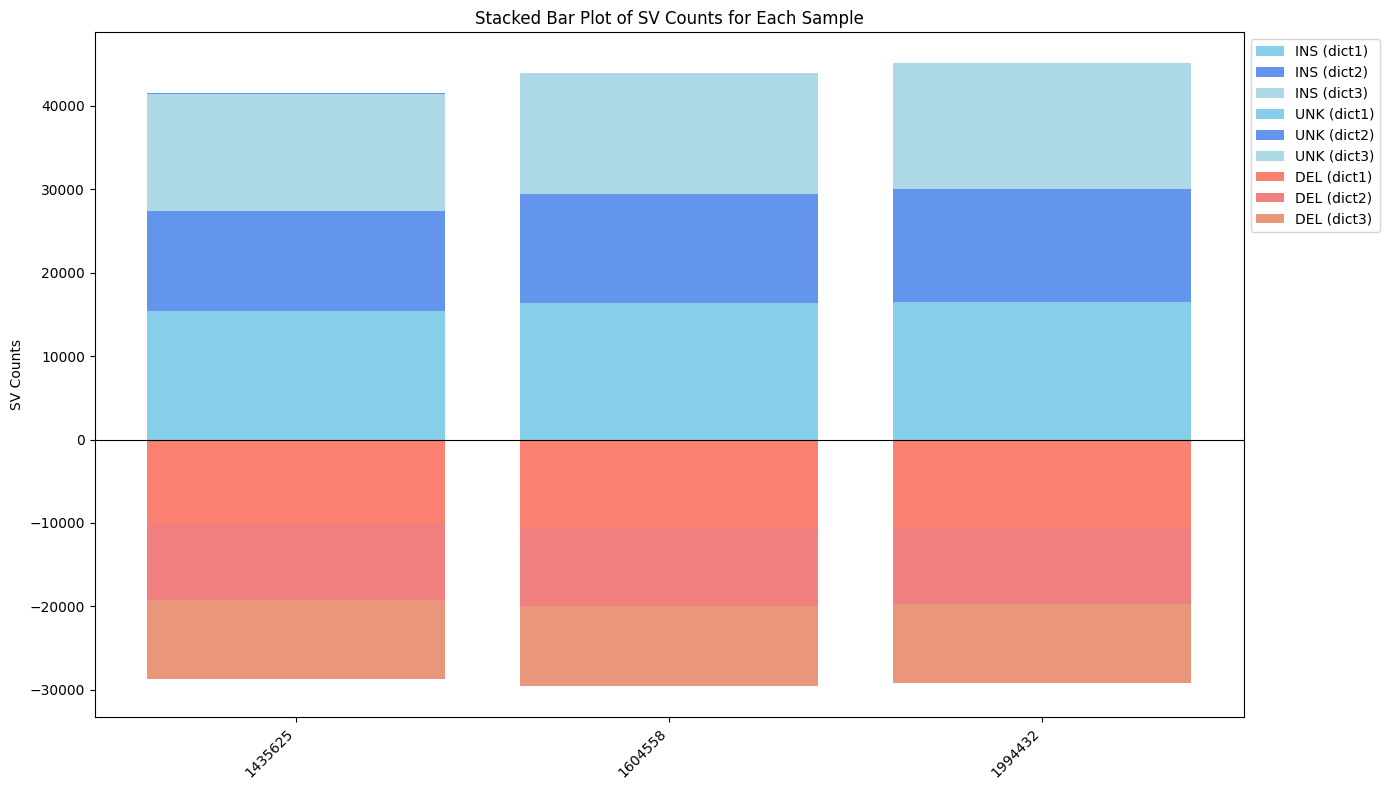

In [30]:
import matplotlib.pyplot as plt
import numpy as np

def plot_sv_counts_multiple(dict1, dict2, dict3):
    """
    Creates a stacked bar plot of SV counts for each sample using three SV count dictionaries.

    Parameters:
        dict1, dict2, dict3 (dict): Nested dictionaries with sample names as keys,
                                    SVTYPEs as subkeys, and counts as values.
                                    Sample names must be the same across all dictionaries.
    """
    # Extract sample names (assume same order for all dictionaries)
    samples = list(dict1.keys())
    svtypes = ['INS', 'DEL', 'UNK']  # Define SV types to include in the plot

    # Prepare data arrays for each SVTYPE and dictionary
    data = {svtype: {'dict1': [], 'dict2': [], 'dict3': []} for svtype in svtypes}
    for sample in samples:
        for svtype in svtypes:
            data[svtype]['dict1'].append(dict1[sample].get(svtype, 0))
            data[svtype]['dict2'].append(dict2[sample].get(svtype, 0))
            data[svtype]['dict3'].append(dict3[sample].get(svtype, 0))

    # Define x-axis positions for samples
    x = np.arange(len(samples))

    # Set up the figure
    fig, ax = plt.subplots(figsize=(14, 8))

    # Initialize bottom arrays for positive (insertions/unknowns) and negative (deletions) stacks
    bottom_insertion = np.zeros(len(samples))
    bottom_deletion = np.zeros(len(samples))

    # Stack for each SVTYPE and dictionary
    for svtype in ['INS', 'UNK']:  # Positive y-axis
        for label, color, counts in zip(['dict1', 'dict2', 'dict3'], 
                                        ['skyblue', 'cornflowerblue', 'lightblue'], 
                                        [data[svtype]['dict1'], data[svtype]['dict2'], data[svtype]['dict3']]):
            ax.bar(x, counts, bottom=bottom_insertion, label=f'{svtype} ({label})', color=color)
            bottom_insertion += counts

    for svtype in ['DEL']:  # Negative y-axis
        for label, color, counts in zip(['dict1', 'dict2', 'dict3'], 
                                        ['salmon', 'lightcoral', 'darksalmon'], 
                                        [data[svtype]['dict1'], data[svtype]['dict2'], data[svtype]['dict3']]):
            ax.bar(x, [-count for count in counts], bottom=bottom_deletion, label=f'{svtype} ({label})', color=color)
            bottom_deletion -= counts

    # Customize the plot
    ax.axhline(0, color='black', linewidth=0.8)  # Add a horizontal line at y=0
    ax.set_xticks(x)
    ax.set_xticklabels(samples, rotation=45, ha='right')  # Rotate x-axis labels for better visibility
    ax.set_ylabel('SV Counts')
    ax.set_title('Stacked Bar Plot of SV Counts for Each Sample')
    ax.legend(loc='upper left', bbox_to_anchor=(1, 1))  # Place legend outside the plot

    # Adjust layout
    plt.tight_layout()
    plt.show()

# Example usage
dict1 = {
    '1435625': {'INS': 15427, 'DEL': 10257, 'UNK': 37},
    '1604558': {'INS': 16382, 'DEL': 10715, 'UNK': 32},
    '1994432': {'INS': 16497, 'DEL': 10661, 'UNK': 35},
}
dict2 = {
    '1435625': {'INS': 12000, 'DEL': 9000, 'UNK': 20},
    '1604558': {'INS': 13000, 'DEL': 9200, 'UNK': 25},
    '1994432': {'INS': 13500, 'DEL': 9100, 'UNK': 22},
}
dict3 = {
    '1435625': {'INS': 14000, 'DEL': 9500, 'UNK': 30},
    '1604558': {'INS': 14500, 'DEL': 9600, 'UNK': 28},
    '1994432': {'INS': 15000, 'DEL': 9400, 'UNK': 33},
}

plot_sv_counts_multiple(dict1, dict2, dict3)

In [ ]:
!wget -O 